# Data van 1 file

In [40]:
import pandas as pd
import numpy as np
import matplotlib as plt
pd.options.mode.chained_assignment = None
import glob

In [41]:
data = pd.read_csv('C:/Users/20175848/Documents/waterschap-datachallenge/data/den bosch/sewer_data_db/data_pump_flow/debieten en draaiuren 01012018 - 30042018.csv', sep = ';')
data = data.drop(data.index[0:4])
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data.columns = data.iloc[0]
data = data.drop(data.index[0])
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data['TIJDSTIP'] = pd.to_datetime(data['TIJDSTIP'], format = '%d-%m-%Y (%H:%M uur)')


In [42]:
#data.groupby('LOCATIE').apply(lambda x: x.sort_values(['TIJDSTIP']))
#debiet = data[data['MEETPUNT'] == 'Debiet ']
data2 = data.groupby(['LOCATIE', 'MEETPUNT'])

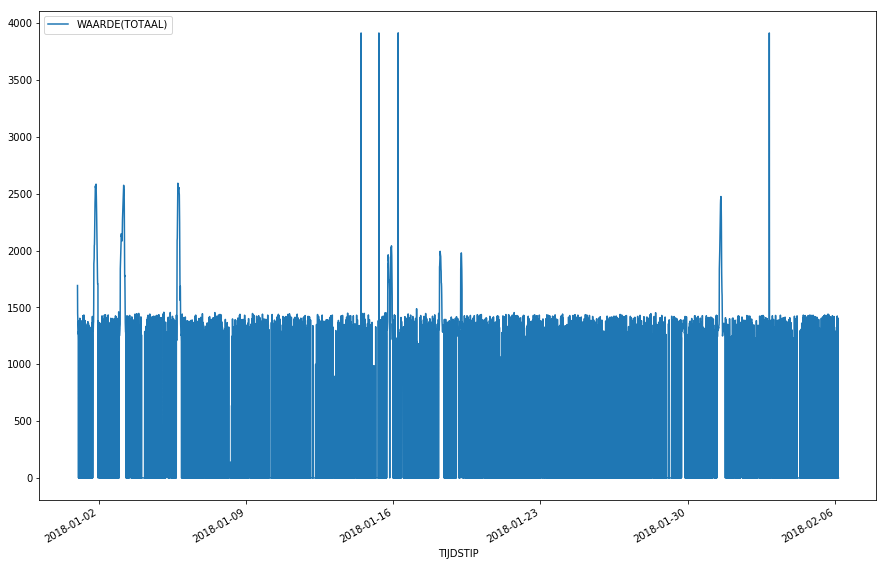

In [43]:
for i, df in data2:
    if df['MEETPUNT'].all() == 'Debiet ':
        df['WAARDE(TOTAAL)'] = df['WAARDE(TOTAAL)'].astype(int)
        df.plot(x= 'TIJDSTIP', y = 'WAARDE(TOTAAL)', figsize=(15,10))

# Data van alle files

In [53]:
path = 'C:/Users/20175848/Documents/waterschap-datachallenge/data/den bosch/sewer_data_db/data_pump_flow/'
all_files = glob.glob(path + '/*.csv')
data = pd.DataFrame()
for filename in all_files:
    temp = pd.read_csv(filename, sep = ';')
    temp = temp.drop(temp.index[0:4])
    data = pd.concat([data, temp])

data = data.reset_index()
data = data.drop(['index'], axis = 1)
data.columns = data.iloc[0]
data = data.drop(data.index[0])
data = data.reset_index()
data = data.drop(['index'], axis = 1)
data = data[data['LOCATIE'] != 'LOCATIE']
data['TIJDSTIP'] = pd.to_datetime(data['TIJDSTIP'], format = '%d-%m-%Y (%H:%M uur)')
print(data['TIJDSTIP'].max())

data2 = data.groupby(['LOCATIE', 'MEETPUNT'])

2019-08-31 23:00:00
2018-01-01 00:00:00
2018-01-01 01:00:00
2018-01-01 02:00:00
2018-01-01 03:00:00
2018-01-01 04:00:00
2018-01-01 05:00:00
2018-01-01 06:00:00
2018-01-01 06:25:00
2018-01-01 07:00:00
2018-01-01 08:00:00
2018-01-01 09:00:00
2018-01-01 10:00:00
2018-01-01 11:00:00
2018-01-01 12:00:00
2018-01-01 12:25:00
2018-01-01 13:00:00
2018-01-01 14:00:00
2018-01-01 15:00:00
2018-01-01 16:00:00
2018-01-01 17:00:00
2018-01-01 18:00:00
2018-01-01 19:00:00
2018-01-01 20:00:00
2018-01-01 21:00:00
2018-01-01 22:00:00
2018-01-01 23:00:00
2018-01-02 00:00:00
2018-01-02 00:25:00
2018-01-02 01:00:00
2018-01-02 02:00:00
2018-01-02 03:00:00
2018-01-02 04:00:00
2018-01-02 05:00:00
2018-01-02 06:00:00
2018-01-02 06:25:00
2018-01-02 07:00:00
2018-01-02 08:00:00
2018-01-02 09:00:00
2018-01-02 10:00:00
2018-01-02 11:00:00
2018-01-02 12:00:00
2018-01-02 12:25:00
2018-01-02 13:00:00
2018-01-02 14:00:00
2018-01-02 15:00:00
2018-01-02 16:00:00
2018-01-02 17:00:00
2018-01-02 18:00:00
2018-01-02 18:25:00


2018-03-09 12:00:00
2018-03-09 12:25:00
2018-03-09 13:00:00
2018-03-09 14:00:00
2018-03-09 15:00:00
2018-03-09 16:00:00
2018-03-09 17:00:00
2018-03-09 18:00:00
2018-03-09 18:25:00
2018-03-09 19:00:00
2018-03-09 20:00:00
2018-03-09 21:00:00
2018-03-09 22:00:00
2018-03-09 23:00:00
2018-03-10 00:00:00
2018-03-10 00:25:00
2018-03-10 01:00:00
2018-03-10 02:00:00
2018-03-10 03:00:00
2018-03-10 04:00:00
2018-03-10 05:00:00
2018-03-10 06:00:00
2018-03-10 06:25:00
2018-03-10 07:00:00
2018-03-10 08:00:00
2018-03-10 09:00:00
2018-03-10 10:00:00
2018-03-10 11:00:00
2018-03-10 12:00:00
2018-03-10 12:25:00
2018-03-10 13:00:00
2018-03-10 14:00:00
2018-03-10 15:00:00
2018-03-10 16:00:00
2018-03-10 17:00:00
2018-03-10 18:00:00
2018-03-10 18:25:00
2018-03-10 19:00:00
2018-03-10 20:00:00
2018-03-10 21:00:00
2018-03-10 22:00:00
2018-03-10 23:00:00
2018-03-11 00:00:00
2018-03-11 01:00:00
2018-03-11 02:00:00
2018-03-11 03:00:00
2018-03-11 04:00:00
2018-03-11 05:00:00
2018-03-11 06:00:00
2018-03-11 06:25:00


2018-01-02 08:00:00
2018-01-02 09:00:00
2018-01-02 10:00:00
2018-01-02 11:00:00
2018-01-02 12:00:00
2018-01-02 12:25:00
2018-01-02 13:00:00
2018-01-02 14:00:00
2018-01-02 15:00:00
2018-01-02 16:00:00
2018-01-02 17:00:00
2018-01-02 18:00:00
2018-01-02 18:25:00
2018-01-02 19:00:00
2018-01-02 20:00:00
2018-01-02 21:00:00
2018-01-02 22:00:00
2018-01-02 23:00:00
2018-01-03 00:00:00
2018-01-03 01:00:00
2018-01-03 02:00:00
2018-01-03 03:00:00
2018-01-03 04:00:00
2018-01-03 05:00:00
2018-01-03 06:00:00
2018-01-03 06:25:00
2018-01-03 07:00:00
2018-01-03 08:00:00
2018-01-03 09:00:00
2018-01-03 10:00:00
2018-01-03 11:00:00
2018-01-03 12:00:00
2018-01-03 13:00:00
2018-01-03 14:00:00
2018-01-03 15:00:00
2018-01-03 16:00:00
2018-01-03 17:00:00
2018-01-03 18:00:00
2018-01-03 18:25:00
2018-01-03 19:00:00
2018-01-03 20:00:00
2018-01-03 21:00:00
2018-01-03 22:00:00
2018-01-03 23:00:00
2018-01-04 00:00:00
2018-01-04 00:25:00
2018-01-04 01:00:00
2018-01-04 02:00:00
2018-01-04 03:00:00
2018-01-04 04:00:00


2018-03-10 12:25:00
2018-03-10 13:00:00
2018-03-10 14:00:00
2018-03-10 15:00:00
2018-03-10 16:00:00
2018-03-10 17:00:00
2018-03-10 18:00:00
2018-03-10 18:25:00
2018-03-10 19:00:00
2018-03-10 20:00:00
2018-03-10 21:00:00
2018-03-10 22:00:00
2018-03-10 23:00:00
2018-03-11 00:00:00
2018-03-11 01:00:00
2018-03-11 02:00:00
2018-03-11 03:00:00
2018-03-11 04:00:00
2018-03-11 05:00:00
2018-03-11 06:00:00
2018-03-11 06:25:00
2018-03-11 07:00:00
2018-03-11 08:00:00
2018-03-11 09:00:00
2018-03-11 10:00:00
2018-03-11 11:00:00
2018-03-11 12:00:00
2018-03-11 13:00:00
2018-03-11 14:00:00
2018-03-11 15:00:00
2018-03-11 16:00:00
2018-03-11 17:00:00
2018-03-11 18:00:00
2018-03-11 18:25:00
2018-03-11 19:00:00
2018-03-11 20:00:00
2018-03-11 21:00:00
2018-03-11 22:00:00
2018-03-11 23:00:00
2018-03-12 00:00:00
2018-03-12 00:25:00
2018-03-12 01:00:00
2018-03-12 02:00:00
2018-03-12 03:00:00
2018-03-12 04:00:00
2018-03-12 05:00:00
2018-03-12 06:00:00
2018-03-12 06:25:00
2018-03-12 07:00:00
2018-03-12 08:00:00


2018-01-05 03:00:00
2018-01-05 04:00:00
2018-01-05 05:00:00
2018-01-05 06:00:00
2018-01-05 06:25:00
2018-01-05 07:00:00
2018-01-05 08:00:00
2018-01-05 09:00:00
2018-01-05 10:00:00
2018-01-05 11:00:00
2018-01-05 12:00:00
2018-01-05 13:00:00
2018-01-05 14:00:00
2018-01-05 15:00:00
2018-01-05 16:00:00
2018-01-05 17:00:00
2018-01-05 18:00:00
2018-01-05 18:25:00
2018-01-05 19:00:00
2018-01-05 20:00:00
2018-01-05 21:00:00
2018-01-05 22:00:00
2018-01-05 23:00:00
2018-01-06 00:00:00
2018-01-06 01:00:00
2018-01-06 02:00:00
2018-01-06 03:00:00
2018-01-06 04:00:00
2018-01-06 05:00:00
2018-01-06 06:00:00
2018-01-06 06:25:00
2018-01-06 07:00:00
2018-01-06 08:00:00
2018-01-06 09:00:00
2018-01-06 10:00:00
2018-01-06 11:00:00
2018-01-06 12:00:00
2018-01-06 13:00:00
2018-01-06 14:00:00
2018-01-06 15:00:00
2018-01-06 16:00:00
2018-01-06 17:00:00
2018-01-06 18:00:00
2018-01-06 18:25:00
2018-01-06 19:00:00
2018-01-06 20:00:00
2018-01-06 21:00:00
2018-01-06 22:00:00
2018-01-06 23:00:00
2018-01-07 00:00:00


2018-03-19 19:00:00
2018-03-19 20:00:00
2018-03-19 21:00:00
2018-03-19 22:00:00
2018-03-19 23:00:00
2018-03-20 00:00:00
2018-03-20 00:25:00
2018-03-20 01:00:00
2018-03-20 02:00:00
2018-03-20 03:00:00
2018-03-20 04:00:00
2018-03-20 05:00:00
2018-03-20 06:00:00
2018-03-20 06:25:00
2018-03-20 07:00:00
2018-03-20 08:00:00
2018-03-20 09:00:00
2018-03-20 10:00:00
2018-03-20 11:00:00
2018-03-20 12:00:00
2018-03-20 12:25:00
2018-03-20 13:00:00
2018-03-20 14:00:00
2018-03-20 15:00:00
2018-03-20 16:00:00
2018-03-20 17:00:00
2018-03-20 18:00:00
2018-03-20 18:25:00
2018-03-20 19:00:00
2018-03-20 20:00:00
2018-03-20 21:00:00
2018-03-20 22:00:00
2018-03-20 23:00:00
2018-03-21 00:00:00
2018-03-21 00:25:00
2018-03-21 01:00:00
2018-03-21 02:00:00
2018-03-21 03:00:00
2018-03-21 04:00:00
2018-03-21 05:00:00
2018-03-21 06:00:00
2018-03-21 06:25:00
2018-03-21 07:00:00
2018-03-21 08:00:00
2018-03-21 09:00:00
2018-03-21 10:00:00
2018-03-21 11:00:00
2018-03-21 12:00:00
2018-03-21 13:00:00
2018-03-21 14:00:00


2018-01-06 22:40:00
2018-01-06 22:50:00
2018-01-06 23:00:00
2018-01-06 23:10:00
2018-01-06 23:20:00
2018-01-06 23:30:00
2018-01-06 23:40:00
2018-01-06 23:50:00
2018-01-07 00:00:00
2018-01-07 00:10:00
2018-01-07 00:20:00
2018-01-07 00:30:00
2018-01-07 00:40:00
2018-01-07 00:50:00
2018-01-07 01:00:00
2018-01-07 01:10:00
2018-01-07 01:20:00
2018-01-07 01:30:00
2018-01-07 01:40:00
2018-01-07 01:50:00
2018-01-07 02:00:00
2018-01-07 02:10:00
2018-01-07 02:20:00
2018-01-07 02:30:00
2018-01-07 02:40:00
2018-01-07 02:50:00
2018-01-07 03:00:00
2018-01-07 03:10:00
2018-01-07 03:20:00
2018-01-07 03:30:00
2018-01-07 03:40:00
2018-01-07 03:50:00
2018-01-07 04:00:00
2018-01-07 04:10:00
2018-01-07 04:20:00
2018-01-07 04:30:00
2018-01-07 04:40:00
2018-01-07 04:50:00
2018-01-07 05:00:00
2018-01-07 05:10:00
2018-01-07 05:20:00
2018-01-07 05:30:00
2018-01-07 05:40:00
2018-01-07 05:50:00
2018-01-07 06:00:00
2018-01-07 06:10:00
2018-01-07 06:20:00
2018-01-07 06:30:00
2018-01-07 06:40:00
2018-01-07 06:50:00


2018-01-20 16:30:00
2018-01-20 16:40:00
2018-01-20 16:50:00
2018-01-20 17:00:00
2018-01-20 17:10:00
2018-01-20 17:20:00
2018-01-20 17:30:00
2018-01-20 17:40:00
2018-01-20 17:50:00
2018-01-20 18:00:00
2018-01-20 18:10:00
2018-01-20 18:20:00
2018-01-20 18:30:00
2018-01-20 18:40:00
2018-01-20 18:50:00
2018-01-20 19:00:00
2018-01-20 19:10:00
2018-01-20 19:20:00
2018-01-20 19:30:00
2018-01-20 19:40:00
2018-01-20 19:50:00
2018-01-20 20:00:00
2018-01-20 20:10:00
2018-01-20 20:20:00
2018-01-20 20:30:00
2018-01-20 20:40:00
2018-01-20 20:50:00
2018-01-20 21:00:00
2018-01-20 21:10:00
2018-01-20 21:20:00
2018-01-20 21:30:00
2018-01-20 21:40:00
2018-01-20 21:50:00
2018-01-20 22:00:00
2018-01-20 22:10:00
2018-01-20 22:20:00
2018-01-20 22:30:00
2018-01-20 22:40:00
2018-01-20 22:50:00
2018-01-20 23:00:00
2018-01-20 23:10:00
2018-01-20 23:20:00
2018-01-20 23:30:00
2018-01-20 23:40:00
2018-01-20 23:50:00
2018-01-21 00:00:00
2018-01-21 00:10:00
2018-01-21 00:20:00
2018-01-21 00:30:00
2018-01-21 00:40:00


2018-01-31 01:00:00
2018-01-31 01:10:00
2018-01-31 01:20:00
2018-01-31 01:30:00
2018-01-31 01:40:00
2018-01-31 01:50:00
2018-01-31 02:00:00
2018-01-31 02:10:00
2018-01-31 02:20:00
2018-01-31 02:30:00
2018-01-31 02:40:00
2018-01-31 02:50:00
2018-01-31 03:00:00
2018-01-31 03:10:00
2018-01-31 03:20:00
2018-01-31 03:30:00
2018-01-31 03:40:00
2018-01-31 03:50:00
2018-01-31 04:00:00
2018-01-31 04:10:00
2018-01-31 04:20:00
2018-01-31 04:30:00
2018-01-31 04:40:00
2018-01-31 04:50:00
2018-01-31 05:00:00
2018-01-31 05:10:00
2018-01-31 05:20:00
2018-01-31 05:30:00
2018-01-31 05:40:00
2018-01-31 05:50:00
2018-01-31 06:00:00
2018-01-31 06:10:00
2018-01-31 06:20:00
2018-01-31 06:26:00
2018-01-31 06:30:00
2018-01-31 06:40:00
2018-01-31 06:50:00
2018-01-31 07:00:00
2018-01-31 07:10:00
2018-01-31 07:20:00
2018-01-31 07:30:00
2018-01-31 07:40:00
2018-01-31 07:50:00
2018-01-31 08:00:00
2018-01-31 08:10:00
2018-01-31 08:20:00
2018-01-31 08:30:00
2018-01-31 08:40:00
2018-01-31 08:50:00
2018-01-31 09:00:00


2019-01-23 14:00:00
2019-01-23 15:00:00
2019-01-23 16:00:00
2019-01-23 17:00:00
2019-01-23 18:00:00
2019-01-23 18:25:00
2019-01-23 19:00:00
2019-01-23 20:00:00
2019-01-23 21:00:00
2019-01-23 22:00:00
2019-01-23 23:00:00
2019-01-24 00:00:00
2019-01-24 00:25:00
2019-01-24 01:00:00
2019-01-24 02:00:00
2019-01-24 03:00:00
2019-01-24 04:00:00
2019-01-24 05:00:00
2019-01-24 06:00:00
2019-01-24 06:25:00
2019-01-24 07:00:00
2019-01-24 08:00:00
2019-01-24 09:00:00
2019-01-24 10:00:00
2019-01-24 11:00:00
2019-01-24 12:00:00
2019-01-24 13:00:00
2019-01-24 14:00:00
2019-01-24 15:00:00
2019-01-24 16:00:00
2019-01-24 17:00:00
2019-01-24 18:00:00
2019-01-24 19:00:00
2019-01-24 20:00:00
2019-01-24 21:00:00
2019-01-24 22:00:00
2019-01-24 23:00:00
2019-01-25 00:00:00
2019-01-25 00:25:00
2019-01-25 01:00:00
2019-01-25 02:00:00
2019-01-25 03:00:00
2019-01-25 04:00:00
2019-01-25 05:00:00
2019-01-25 06:00:00
2019-01-25 06:25:00
2019-01-25 07:00:00
2019-01-25 08:00:00
2019-01-25 09:00:00
2019-01-25 10:00:00


2019-03-30 20:00:00
2019-03-30 21:00:00
2019-03-30 22:00:00
2019-03-30 23:00:00
2019-03-31 00:00:00
2019-03-31 00:25:00
2019-03-31 01:00:00
2019-03-31 03:00:00
2019-03-31 04:00:00
2019-03-31 05:00:00
2019-03-31 06:00:00
2019-03-31 07:00:00
2019-03-31 07:25:00
2019-03-31 08:00:00
2019-03-31 09:00:00
2019-03-31 10:00:00
2019-03-31 11:00:00
2019-03-31 12:00:00
2019-03-31 13:00:00
2019-03-31 14:00:00
2019-03-31 15:00:00
2019-03-31 16:00:00
2019-03-31 17:00:00
2019-03-31 18:00:00
2019-03-31 18:25:00
2019-03-31 19:00:00
2019-03-31 20:00:00
2019-03-31 21:00:00
2019-03-31 22:00:00
2019-03-31 23:00:00
2019-04-01 00:00:00
2019-04-01 00:25:00
2019-04-01 01:00:00
2019-04-01 02:00:00
2019-04-01 03:00:00
2019-04-01 04:00:00
2019-04-01 05:00:00
2019-04-01 06:00:00
2019-04-01 06:25:00
2019-04-01 07:00:00
2019-04-01 08:00:00
2019-04-01 09:00:00
2019-04-01 10:00:00
2019-04-01 11:00:00
2019-04-01 12:00:00
2019-04-01 12:25:00
2019-04-01 13:00:00
2019-04-01 14:00:00
2019-04-01 15:00:00
2019-04-01 16:00:00


2019-02-03 20:00:00
2019-02-03 21:00:00
2019-02-03 22:00:00
2019-02-03 23:00:00
2019-02-04 00:00:00
2019-02-04 00:25:00
2019-02-04 01:00:00
2019-02-04 02:00:00
2019-02-04 03:00:00
2019-02-04 04:00:00
2019-02-04 05:00:00
2019-02-04 06:00:00
2019-02-04 06:25:00
2019-02-04 07:00:00
2019-02-04 08:00:00
2019-02-04 09:00:00
2019-02-04 10:00:00
2019-02-04 11:00:00
2019-02-04 12:00:00
2019-02-04 13:00:00
2019-02-04 14:00:00
2019-02-04 15:00:00
2019-02-04 16:00:00
2019-02-04 17:00:00
2019-02-04 18:00:00
2019-02-04 18:25:00
2019-02-04 19:00:00
2019-02-04 20:00:00
2019-02-04 21:00:00
2019-02-04 22:00:00
2019-02-04 23:00:00
2019-02-05 00:00:00
2019-02-05 01:00:00
2019-02-05 02:00:00
2019-02-05 03:00:00
2019-02-05 04:00:00
2019-02-05 05:00:00
2019-02-05 06:00:00
2019-02-05 07:00:00
2019-02-05 08:00:00
2019-02-05 09:00:00
2019-02-05 10:00:00
2019-02-05 11:00:00
2019-02-05 12:00:00
2019-02-05 12:25:00
2019-02-05 13:00:00
2019-02-05 14:00:00
2019-02-05 14:44:00
2019-02-05 15:00:00
2019-02-05 16:00:00


2019-04-01 10:00:00
2019-04-01 11:00:00
2019-04-01 12:00:00
2019-04-01 12:25:00
2019-04-01 13:00:00
2019-04-01 14:00:00
2019-04-01 15:00:00
2019-04-01 16:00:00
2019-04-01 17:00:00
2019-04-01 18:00:00
2019-04-01 19:00:00
2019-04-01 20:00:00
2019-04-01 21:00:00
2019-04-01 22:00:00
2019-04-01 23:00:00
2019-04-02 00:00:00
2019-04-02 00:25:00
2019-04-02 01:00:00
2019-04-02 02:00:00
2019-04-02 03:00:00
2019-04-02 04:00:00
2019-04-02 05:00:00
2019-04-02 06:00:00
2019-04-02 07:00:00
2019-04-02 08:00:00
2019-04-02 09:00:00
2019-04-02 10:00:00
2019-04-02 11:00:00
2019-04-02 12:00:00
2019-04-02 12:25:00
2019-04-02 13:00:00
2019-04-02 14:00:00
2019-04-02 15:00:00
2019-04-02 16:00:00
2019-04-02 17:00:00
2019-04-02 18:00:00
2019-04-02 19:00:00
2019-04-02 20:00:00
2019-04-02 21:00:00
2019-04-02 22:00:00
2019-04-02 23:00:00
2019-04-03 00:00:00
2019-04-03 01:00:00
2019-04-03 02:00:00
2019-04-03 03:00:00
2019-04-03 04:00:00
2019-04-03 05:00:00
2019-04-03 06:00:00
2019-04-03 07:00:00
2019-04-03 08:00:00


2019-02-15 20:00:00
2019-02-15 21:00:00
2019-02-15 22:00:00
2019-02-15 23:00:00
2019-02-16 00:00:00
2019-02-16 01:00:00
2019-02-16 02:00:00
2019-02-16 03:00:00
2019-02-16 04:00:00
2019-02-16 05:00:00
2019-02-16 06:00:00
2019-02-16 06:25:00
2019-02-16 07:00:00
2019-02-16 08:00:00
2019-02-16 09:00:00
2019-02-16 10:00:00
2019-02-16 11:00:00
2019-02-16 12:00:00
2019-02-16 12:25:00
2019-02-16 13:00:00
2019-02-16 14:00:00
2019-02-16 15:00:00
2019-02-16 16:00:00
2019-02-16 17:00:00
2019-02-16 18:00:00
2019-02-16 18:25:00
2019-02-16 19:00:00
2019-02-16 20:00:00
2019-02-16 21:00:00
2019-02-16 22:00:00
2019-02-16 23:00:00
2019-02-17 00:00:00
2019-02-17 01:00:00
2019-02-17 02:00:00
2019-02-17 03:00:00
2019-02-17 04:00:00
2019-02-17 05:00:00
2019-02-17 06:00:00
2019-02-17 06:25:00
2019-02-17 07:00:00
2019-02-17 08:00:00
2019-02-17 09:00:00
2019-02-17 10:00:00
2019-02-17 11:00:00
2019-02-17 12:00:00
2019-02-17 13:00:00
2019-02-17 14:00:00
2019-02-17 15:00:00
2019-02-17 16:00:00
2019-02-17 17:00:00


2019-01-01 05:00:00
2019-01-01 05:10:00
2019-01-01 05:20:00
2019-01-01 05:30:00
2019-01-01 05:40:00
2019-01-01 05:50:00
2019-01-01 06:00:00
2019-01-01 06:10:00
2019-01-01 06:20:00
2019-01-01 06:25:00
2019-01-01 06:30:00
2019-01-01 06:40:00
2019-01-01 06:50:00
2019-01-01 07:00:00
2019-01-01 07:10:00
2019-01-01 07:20:00
2019-01-01 07:30:00
2019-01-01 07:40:00
2019-01-01 07:50:00
2019-01-01 08:00:00
2019-01-01 08:10:00
2019-01-01 08:20:00
2019-01-01 08:30:00
2019-01-01 08:40:00
2019-01-01 08:50:00
2019-01-01 09:00:00
2019-01-01 09:10:00
2019-01-01 09:20:00
2019-01-01 09:30:00
2019-01-01 09:40:00
2019-01-01 09:50:00
2019-01-01 10:00:00
2019-01-01 10:10:00
2019-01-01 10:20:00
2019-01-01 10:30:00
2019-01-01 10:40:00
2019-01-01 10:50:00
2019-01-01 11:00:00
2019-01-01 11:10:00
2019-01-01 11:20:00
2019-01-01 11:30:00
2019-01-01 11:40:00
2019-01-01 11:50:00
2019-01-01 12:00:00
2019-01-01 12:10:00
2019-01-01 12:20:00
2019-01-01 12:30:00
2019-01-01 12:40:00
2019-01-01 12:50:00
2019-01-01 13:00:00


2019-01-11 15:50:00
2019-01-11 16:00:00
2019-01-11 16:10:00
2019-01-11 16:20:00
2019-01-11 16:30:00
2019-01-11 16:40:00
2019-01-11 16:50:00
2019-01-11 17:00:00
2019-01-11 17:10:00
2019-01-11 17:20:00
2019-01-11 17:30:00
2019-01-11 17:40:00
2019-01-11 17:50:00
2019-01-11 18:00:00
2019-01-11 18:10:00
2019-01-11 18:20:00
2019-01-11 18:30:00
2019-01-11 18:40:00
2019-01-11 18:50:00
2019-01-11 19:00:00
2019-01-11 19:10:00
2019-01-11 19:20:00
2019-01-11 19:30:00
2019-01-11 19:40:00
2019-01-11 19:50:00
2019-01-11 20:00:00
2019-01-11 20:10:00
2019-01-11 20:20:00
2019-01-11 20:30:00
2019-01-11 20:40:00
2019-01-11 20:50:00
2019-01-11 21:00:00
2019-01-11 21:10:00
2019-01-11 21:20:00
2019-01-11 21:30:00
2019-01-11 21:40:00
2019-01-11 21:50:00
2019-01-11 22:00:00
2019-01-11 22:10:00
2019-01-11 22:20:00
2019-01-11 22:30:00
2019-01-11 22:40:00
2019-01-11 22:50:00
2019-01-11 23:00:00
2019-01-11 23:10:00
2019-01-11 23:20:00
2019-01-11 23:30:00
2019-01-11 23:40:00
2019-01-11 23:50:00
2019-01-12 00:00:00


2019-01-25 09:30:00
2019-01-25 09:40:00
2019-01-25 09:50:00
2019-01-25 10:00:00
2019-01-25 10:10:00
2019-01-25 10:20:00
2019-01-25 10:30:00
2019-01-25 10:40:00
2019-01-25 10:50:00
2019-01-25 11:00:00
2019-01-25 11:10:00
2019-01-25 11:20:00
2019-01-25 11:30:00
2019-01-25 11:40:00
2019-01-25 11:50:00
2019-01-25 12:00:00
2019-01-25 12:10:00
2019-01-25 12:20:00
2019-01-25 12:25:00
2019-01-25 12:30:00
2019-01-25 12:40:00
2019-01-25 12:50:00
2019-01-25 13:00:00
2019-01-25 13:10:00
2019-01-25 13:20:00
2019-01-25 13:30:00
2019-01-25 13:40:00
2019-01-25 13:50:00
2019-01-25 14:00:00
2019-01-25 14:10:00
2019-01-25 14:20:00
2019-01-25 14:30:00
2019-01-25 14:40:00
2019-01-25 14:50:00
2019-01-25 15:00:00
2019-01-25 15:10:00
2019-01-25 15:20:00
2019-01-25 15:30:00
2019-01-25 15:40:00
2019-01-25 15:50:00
2019-01-25 16:00:00
2019-01-25 16:10:00
2019-01-25 16:20:00
2019-01-25 16:30:00
2019-01-25 16:40:00
2019-01-25 16:50:00
2019-01-25 17:00:00
2019-01-25 17:10:00
2019-01-25 17:20:00
2019-01-25 17:30:00


2018-05-02 17:00:00
2018-05-02 18:00:00
2018-05-02 19:00:00
2018-05-02 20:00:00
2018-05-02 21:00:00
2018-05-02 22:00:00
2018-05-02 23:00:00
2018-05-03 00:00:00
2018-05-03 01:00:00
2018-05-03 02:00:00
2018-05-03 03:00:00
2018-05-03 04:00:00
2018-05-03 05:00:00
2018-05-03 06:00:00
2018-05-03 07:00:00
2018-05-03 08:00:00
2018-05-03 09:00:00
2018-05-03 10:00:00
2018-05-03 11:00:00
2018-05-03 12:00:00
2018-05-03 12:54:00
2018-05-03 13:00:00
2018-05-03 14:00:00
2018-05-03 14:03:00
2018-05-03 15:00:00
2018-05-03 16:00:00
2018-05-03 16:01:00
2018-05-03 16:58:00
2018-05-03 16:59:00
2018-05-03 17:00:00
2018-05-03 17:16:00
2018-05-03 18:00:00
2018-05-03 19:00:00
2018-05-03 20:00:00
2018-05-03 21:00:00
2018-05-03 21:29:00
2018-05-03 21:30:00
2018-05-03 22:00:00
2018-05-03 23:00:00
2018-05-04 00:00:00
2018-05-04 01:00:00
2018-05-04 02:00:00
2018-05-04 03:00:00
2018-05-04 04:00:00
2018-05-04 05:00:00
2018-05-04 06:00:00
2018-05-04 06:25:00
2018-05-04 07:00:00
2018-05-04 08:00:00
2018-05-04 09:00:00


2018-07-01 07:00:00
2018-07-01 08:00:00
2018-07-01 09:00:00
2018-07-01 10:00:00
2018-07-01 11:00:00
2018-07-01 12:00:00
2018-07-01 12:25:00
2018-07-01 13:00:00
2018-07-01 14:00:00
2018-07-01 15:00:00
2018-07-01 16:00:00
2018-07-01 17:00:00
2018-07-01 18:00:00
2018-07-01 19:00:00
2018-07-01 20:00:00
2018-07-01 21:00:00
2018-07-01 22:00:00
2018-07-01 23:00:00
2018-07-02 00:00:00
2018-07-02 01:00:00
2018-07-02 02:00:00
2018-07-02 03:00:00
2018-07-02 04:00:00
2018-07-02 05:00:00
2018-07-02 06:00:00
2018-07-02 06:25:00
2018-07-02 07:00:00
2018-07-02 08:00:00
2018-07-02 09:00:00
2018-07-02 10:00:00
2018-07-02 11:00:00
2018-07-02 12:00:00
2018-07-02 13:00:00
2018-07-02 14:00:00
2018-07-02 15:00:00
2018-07-02 16:00:00
2018-07-02 17:00:00
2018-07-02 18:00:00
2018-07-02 19:00:00
2018-07-02 20:00:00
2018-07-02 21:00:00
2018-07-02 22:00:00
2018-07-02 23:00:00
2018-07-03 00:00:00
2018-07-03 00:25:00
2018-07-03 01:00:00
2018-07-03 02:00:00
2018-07-03 03:00:00
2018-07-03 04:00:00
2018-07-03 05:00:00


2018-05-14 22:00:00
2018-05-14 23:00:00
2018-05-15 00:00:00
2018-05-15 00:25:00
2018-05-15 01:00:00
2018-05-15 02:00:00
2018-05-15 03:00:00
2018-05-15 04:00:00
2018-05-15 05:00:00
2018-05-15 06:00:00
2018-05-15 06:25:00
2018-05-15 07:00:00
2018-05-15 08:00:00
2018-05-15 09:00:00
2018-05-15 10:00:00
2018-05-15 11:00:00
2018-05-15 12:00:00
2018-05-15 13:00:00
2018-05-15 14:00:00
2018-05-15 15:00:00
2018-05-15 16:00:00
2018-05-15 17:00:00
2018-05-15 18:00:00
2018-05-15 19:00:00
2018-05-15 20:00:00
2018-05-15 21:00:00
2018-05-15 22:00:00
2018-05-15 23:00:00
2018-05-16 00:00:00
2018-05-16 01:00:00
2018-05-16 02:00:00
2018-05-16 03:00:00
2018-05-16 04:00:00
2018-05-16 05:00:00
2018-05-16 06:00:00
2018-05-16 07:00:00
2018-05-16 08:00:00
2018-05-16 09:00:00
2018-05-16 10:00:00
2018-05-16 11:00:00
2018-05-16 12:00:00
2018-05-16 13:00:00
2018-05-16 14:00:00
2018-05-16 14:26:00
2018-05-16 15:00:00
2018-05-16 16:00:00
2018-05-16 17:00:00
2018-05-16 18:00:00
2018-05-16 18:25:00
2018-05-16 19:00:00


2018-07-11 00:25:00
2018-07-11 01:00:00
2018-07-11 02:00:00
2018-07-11 03:00:00
2018-07-11 04:00:00
2018-07-11 05:00:00
2018-07-11 06:00:00
2018-07-11 07:00:00
2018-07-11 08:00:00
2018-07-11 09:00:00
2018-07-11 10:00:00
2018-07-11 11:00:00
2018-07-11 12:00:00
2018-07-11 13:00:00
2018-07-11 14:00:00
2018-07-11 15:00:00
2018-07-11 16:00:00
2018-07-11 17:00:00
2018-07-11 18:00:00
2018-07-11 19:00:00
2018-07-11 20:00:00
2018-07-11 21:00:00
2018-07-11 22:00:00
2018-07-11 23:00:00
2018-07-12 00:00:00
2018-07-12 00:25:00
2018-07-12 01:00:00
2018-07-12 02:00:00
2018-07-12 03:00:00
2018-07-12 04:00:00
2018-07-12 05:00:00
2018-07-12 06:00:00
2018-07-12 06:25:00
2018-07-12 07:00:00
2018-07-12 08:00:00
2018-07-12 09:00:00
2018-07-12 10:00:00
2018-07-12 11:00:00
2018-07-12 12:00:00
2018-07-12 13:00:00
2018-07-12 14:00:00
2018-07-12 15:00:00
2018-07-12 16:00:00
2018-07-12 17:00:00
2018-07-12 18:00:00
2018-07-12 18:25:00
2018-07-12 19:00:00
2018-07-12 20:00:00
2018-07-12 21:00:00
2018-07-12 22:00:00


2018-05-24 05:00:00
2018-05-24 06:00:00
2018-05-24 06:25:00
2018-05-24 07:00:00
2018-05-24 08:00:00
2018-05-24 09:00:00
2018-05-24 10:00:00
2018-05-24 11:00:00
2018-05-24 12:00:00
2018-05-24 13:00:00
2018-05-24 14:00:00
2018-05-24 15:00:00
2018-05-24 16:00:00
2018-05-24 17:00:00
2018-05-24 18:00:00
2018-05-24 19:00:00
2018-05-24 20:00:00
2018-05-24 21:00:00
2018-05-24 22:00:00
2018-05-24 23:00:00
2018-05-25 00:00:00
2018-05-25 00:25:00
2018-05-25 01:00:00
2018-05-25 02:00:00
2018-05-25 03:00:00
2018-05-25 04:00:00
2018-05-25 05:00:00
2018-05-25 06:00:00
2018-05-25 07:00:00
2018-05-25 08:00:00
2018-05-25 09:00:00
2018-05-25 10:00:00
2018-05-25 11:00:00
2018-05-25 12:00:00
2018-05-25 13:00:00
2018-05-25 14:00:00
2018-05-25 15:00:00
2018-05-25 16:00:00
2018-05-25 17:00:00
2018-05-25 18:00:00
2018-05-25 19:00:00
2018-05-25 20:00:00
2018-05-25 21:00:00
2018-05-25 22:00:00
2018-05-25 23:00:00
2018-05-26 00:00:00
2018-05-26 01:00:00
2018-05-26 02:00:00
2018-05-26 03:00:00
2018-05-26 04:00:00


2018-08-08 03:00:00
2018-08-08 04:00:00
2018-08-08 05:00:00
2018-08-08 06:00:00
2018-08-08 06:25:00
2018-08-08 07:00:00
2018-08-08 08:00:00
2018-08-08 09:00:00
2018-08-08 10:00:00
2018-08-08 11:00:00
2018-08-08 11:28:00
2018-08-08 12:00:00
2018-08-08 12:25:00
2018-08-08 13:00:00
2018-08-08 14:00:00
2018-08-08 15:00:00
2018-08-08 16:00:00
2018-08-08 17:00:00
2018-08-08 18:00:00
2018-08-08 18:25:00
2018-08-08 19:00:00
2018-08-08 20:00:00
2018-08-08 21:00:00
2018-08-08 22:00:00
2018-08-08 23:00:00
2018-08-09 00:00:00
2018-08-09 00:25:00
2018-08-09 01:00:00
2018-08-09 02:00:00
2018-08-09 03:00:00
2018-08-09 04:00:00
2018-08-09 05:00:00
2018-08-09 06:00:00
2018-08-09 07:00:00
2018-08-09 08:00:00
2018-08-09 09:00:00
2018-08-09 10:00:00
2018-08-09 11:00:00
2018-08-09 12:00:00
2018-08-09 13:00:00
2018-08-09 14:00:00
2018-08-09 15:00:00
2018-08-09 16:00:00
2018-08-09 17:00:00
2018-08-09 18:00:00
2018-08-09 18:25:00
2018-08-09 19:00:00
2018-08-09 19:46:00
2018-08-09 20:00:00
2018-08-09 21:00:00


2018-05-10 09:10:00
2018-05-10 09:20:00
2018-05-10 09:30:00
2018-05-10 09:40:00
2018-05-10 09:50:00
2018-05-10 10:00:00
2018-05-10 10:10:00
2018-05-10 10:20:00
2018-05-10 10:30:00
2018-05-10 10:40:00
2018-05-10 10:50:00
2018-05-10 11:00:00
2018-05-10 11:10:00
2018-05-10 11:20:00
2018-05-10 11:30:00
2018-05-10 11:40:00
2018-05-10 11:50:00
2018-05-10 12:00:00
2018-05-10 12:10:00
2018-05-10 12:20:00
2018-05-10 12:25:00
2018-05-10 12:30:00
2018-05-10 12:40:00
2018-05-10 12:50:00
2018-05-10 13:00:00
2018-05-10 13:10:00
2018-05-10 13:20:00
2018-05-10 13:30:00
2018-05-10 13:40:00
2018-05-10 13:50:00
2018-05-10 14:00:00
2018-05-10 14:10:00
2018-05-10 14:20:00
2018-05-10 14:30:00
2018-05-10 14:40:00
2018-05-10 14:50:00
2018-05-10 15:00:00
2018-05-10 15:10:00
2018-05-10 15:20:00
2018-05-10 15:30:00
2018-05-10 15:40:00
2018-05-10 15:50:00
2018-05-10 16:00:00
2018-05-10 16:10:00
2018-05-10 16:20:00
2018-05-10 16:30:00
2018-05-10 16:40:00
2018-05-10 16:50:00
2018-05-10 17:00:00
2018-05-10 17:10:00


2018-05-20 17:30:00
2018-05-20 17:40:00
2018-05-20 17:50:00
2018-05-20 18:00:00
2018-05-20 18:10:00
2018-05-20 18:20:00
2018-05-20 18:30:00
2018-05-20 18:40:00
2018-05-20 18:50:00
2018-05-20 19:00:00
2018-05-20 19:10:00
2018-05-20 19:20:00
2018-05-20 19:30:00
2018-05-20 19:40:00
2018-05-20 19:50:00
2018-05-20 20:00:00
2018-05-20 20:10:00
2018-05-20 20:20:00
2018-05-20 20:30:00
2018-05-20 20:40:00
2018-05-20 20:50:00
2018-05-20 21:00:00
2018-05-20 21:10:00
2018-05-20 21:20:00
2018-05-20 21:30:00
2018-05-20 21:40:00
2018-05-20 21:50:00
2018-05-20 22:00:00
2018-05-20 22:10:00
2018-05-20 22:20:00
2018-05-20 22:30:00
2018-05-20 22:40:00
2018-05-20 22:50:00
2018-05-20 23:00:00
2018-05-20 23:10:00
2018-05-20 23:20:00
2018-05-20 23:30:00
2018-05-20 23:40:00
2018-05-20 23:50:00
2018-05-21 00:00:00
2018-05-21 00:10:00
2018-05-21 00:20:00
2018-05-21 00:30:00
2018-05-21 00:40:00
2018-05-21 00:50:00
2018-05-21 01:00:00
2018-05-21 01:10:00
2018-05-21 01:20:00
2018-05-21 01:30:00
2018-05-21 01:40:00


2018-06-03 10:50:00
2018-06-03 11:00:00
2018-06-03 11:10:00
2018-06-03 11:20:00
2018-06-03 11:30:00
2018-06-03 11:40:00
2018-06-03 11:50:00
2018-06-03 12:00:00
2018-06-03 12:10:00
2018-06-03 12:20:00
2018-06-03 12:30:00
2018-06-03 12:40:00
2018-06-03 12:50:00
2018-06-03 13:00:00
2018-06-03 13:10:00
2018-06-03 13:20:00
2018-06-03 13:30:00
2018-06-03 13:40:00
2018-06-03 13:50:00
2018-06-03 14:00:00
2018-06-03 14:10:00
2018-06-03 14:20:00
2018-06-03 14:30:00
2018-06-03 14:40:00
2018-06-03 14:50:00
2018-06-03 15:00:00
2018-06-03 15:10:00
2018-06-03 15:20:00
2018-06-03 15:30:00
2018-06-03 15:40:00
2018-06-03 15:50:00
2018-06-03 16:00:00
2018-06-03 16:10:00
2018-06-03 16:20:00
2018-06-03 16:30:00
2018-06-03 16:40:00
2018-06-03 16:50:00
2018-06-03 17:00:00
2018-06-03 17:10:00
2018-06-03 17:20:00
2018-06-03 17:30:00
2018-06-03 17:40:00
2018-06-03 17:50:00
2018-06-03 18:00:00
2018-06-03 18:10:00
2018-06-03 18:20:00
2018-06-03 18:30:00
2018-06-03 18:40:00
2018-06-03 18:50:00
2018-06-03 19:00:00


2019-07-01 12:00:00
2019-07-01 13:00:00
2019-07-01 13:54:00
2019-07-01 14:00:00
2019-07-01 14:34:00
2019-07-01 15:00:00
2019-07-01 16:00:00
2019-07-01 16:23:00
2019-07-01 17:00:00
2019-07-01 17:03:00
2019-07-01 18:00:00
2019-07-01 19:00:00
2019-07-01 20:00:00
2019-07-01 21:00:00
2019-07-01 22:00:00
2019-07-01 23:00:00
2019-07-02 00:00:00
2019-07-02 00:25:00
2019-07-02 01:00:00
2019-07-02 02:00:00
2019-07-02 03:00:00
2019-07-02 04:00:00
2019-07-02 05:00:00
2019-07-02 06:00:00
2019-07-02 06:25:00
2019-07-02 07:00:00
2019-07-02 08:00:00
2019-07-02 09:00:00
2019-07-02 09:54:00
2019-07-02 10:00:00
2019-07-02 11:00:00
2019-07-02 12:00:00
2019-07-02 13:00:00
2019-07-02 14:00:00
2019-07-02 15:00:00
2019-07-02 16:00:00
2019-07-02 17:00:00
2019-07-02 18:00:00
2019-07-02 18:25:00
2019-07-02 19:00:00
2019-07-02 20:00:00
2019-07-02 21:00:00
2019-07-02 22:00:00
2019-07-02 23:00:00
2019-07-03 00:00:00
2019-07-03 01:00:00
2019-07-03 02:00:00
2019-07-03 03:00:00
2019-07-03 04:00:00
2019-07-03 05:00:00


2019-08-27 05:00:00
2019-08-27 06:00:00
2019-08-27 07:00:00
2019-08-27 08:00:00
2019-08-27 09:00:00
2019-08-27 10:00:00
2019-08-27 11:00:00
2019-08-27 12:00:00
2019-08-27 12:25:00
2019-08-27 13:00:00
2019-08-27 14:00:00
2019-08-27 15:00:00
2019-08-27 16:00:00
2019-08-27 17:00:00
2019-08-27 18:00:00
2019-08-27 18:25:00
2019-08-27 19:00:00
2019-08-27 20:00:00
2019-08-27 21:00:00
2019-08-27 22:00:00
2019-08-27 23:00:00
2019-08-28 00:00:00
2019-08-28 01:00:00
2019-08-28 02:00:00
2019-08-28 03:00:00
2019-08-28 04:00:00
2019-08-28 05:00:00
2019-08-28 06:00:00
2019-08-28 07:00:00
2019-08-28 08:00:00
2019-08-28 09:00:00
2019-08-28 10:00:00
2019-08-28 11:00:00
2019-08-28 12:00:00
2019-08-28 13:00:00
2019-08-28 14:00:00
2019-08-28 15:00:00
2019-08-28 16:00:00
2019-08-28 17:00:00
2019-08-28 18:00:00
2019-08-28 19:00:00
2019-08-28 20:00:00
2019-08-28 21:00:00
2019-08-28 22:00:00
2019-08-28 23:00:00
2019-08-28 23:07:00
2019-08-29 00:00:00
2019-08-29 00:25:00
2019-08-29 01:00:00
2019-08-29 02:00:00


2019-07-12 05:00:00
2019-07-12 06:00:00
2019-07-12 06:27:00
2019-07-12 07:00:00
2019-07-12 08:00:00
2019-07-12 09:00:00
2019-07-12 10:00:00
2019-07-12 11:00:00
2019-07-12 12:00:00
2019-07-12 13:00:00
2019-07-12 14:00:00
2019-07-12 15:00:00
2019-07-12 16:00:00
2019-07-12 17:00:00
2019-07-12 18:00:00
2019-07-12 19:00:00
2019-07-12 20:00:00
2019-07-12 21:00:00
2019-07-12 22:00:00
2019-07-12 23:00:00
2019-07-13 00:00:00
2019-07-13 01:00:00
2019-07-13 02:00:00
2019-07-13 03:00:00
2019-07-13 04:00:00
2019-07-13 05:00:00
2019-07-13 06:00:00
2019-07-13 06:26:00
2019-07-13 07:00:00
2019-07-13 08:00:00
2019-07-13 09:00:00
2019-07-13 10:00:00
2019-07-13 11:00:00
2019-07-13 12:00:00
2019-07-13 13:00:00
2019-07-13 14:00:00
2019-07-13 15:00:00
2019-07-13 16:00:00
2019-07-13 17:00:00
2019-07-13 18:00:00
2019-07-13 19:00:00
2019-07-13 20:00:00
2019-07-13 21:00:00
2019-07-13 22:00:00
2019-07-13 23:00:00
2019-07-14 00:00:00
2019-07-14 01:00:00
2019-07-14 02:00:00
2019-07-14 03:00:00
2019-07-14 04:00:00


2019-05-26 14:00:00
2019-05-26 15:00:00
2019-05-26 16:00:00
2019-05-26 17:00:00
2019-05-26 18:00:00
2019-05-26 19:00:00
2019-05-26 20:00:00
2019-05-26 21:00:00
2019-05-26 22:00:00
2019-05-26 23:00:00
2019-05-27 00:00:00
2019-05-27 01:00:00
2019-05-27 02:00:00
2019-05-27 03:00:00
2019-05-27 04:00:00
2019-05-27 05:00:00
2019-05-27 06:00:00
2019-05-27 06:25:00
2019-05-27 07:00:00
2019-05-27 08:00:00
2019-05-27 09:00:00
2019-05-27 10:00:00
2019-05-27 11:00:00
2019-05-27 12:00:00
2019-05-27 13:00:00
2019-05-27 14:00:00
2019-05-27 15:00:00
2019-05-27 16:00:00
2019-05-27 17:00:00
2019-05-27 18:00:00
2019-05-27 19:00:00
2019-05-27 20:00:00
2019-05-27 21:00:00
2019-05-27 22:00:00
2019-05-27 23:00:00
2019-05-28 00:00:00
2019-05-28 00:25:00
2019-05-28 01:00:00
2019-05-28 02:00:00
2019-05-28 03:00:00
2019-05-28 04:00:00
2019-05-28 05:00:00
2019-05-28 06:00:00
2019-05-28 06:25:00
2019-05-28 07:00:00
2019-05-28 08:00:00
2019-05-28 09:00:00
2019-05-28 10:00:00
2019-05-28 11:00:00
2019-05-28 12:00:00


2019-08-11 01:00:00
2019-08-11 02:00:00
2019-08-11 03:00:00
2019-08-11 04:00:00
2019-08-11 05:00:00
2019-08-11 06:00:00
2019-08-11 06:25:00
2019-08-11 07:00:00
2019-08-11 08:00:00
2019-08-11 09:00:00
2019-08-11 10:00:00
2019-08-11 11:00:00
2019-08-11 12:00:00
2019-08-11 12:25:00
2019-08-11 13:00:00
2019-08-11 14:00:00
2019-08-11 15:00:00
2019-08-11 16:00:00
2019-08-11 17:00:00
2019-08-11 18:00:00
2019-08-11 18:25:00
2019-08-11 19:00:00
2019-08-11 20:00:00
2019-08-11 21:00:00
2019-08-11 22:00:00
2019-08-11 23:00:00
2019-08-12 00:00:00
2019-08-12 00:25:00
2019-08-12 01:00:00
2019-08-12 02:00:00
2019-08-12 03:00:00
2019-08-12 04:00:00
2019-08-12 05:00:00
2019-08-12 06:00:00
2019-08-12 06:25:00
2019-08-12 07:00:00
2019-08-12 08:00:00
2019-08-12 09:00:00
2019-08-12 10:00:00
2019-08-12 11:00:00
2019-08-12 12:00:00
2019-08-12 12:25:00
2019-08-12 13:00:00
2019-08-12 14:00:00
2019-08-12 15:00:00
2019-08-12 16:00:00
2019-08-12 17:00:00
2019-08-12 18:00:00
2019-08-12 19:00:00
2019-08-12 20:00:00


2019-05-11 01:00:00
2019-05-11 01:10:00
2019-05-11 01:20:00
2019-05-11 01:30:00
2019-05-11 01:40:00
2019-05-11 01:50:00
2019-05-11 02:00:00
2019-05-11 02:10:00
2019-05-11 02:20:00
2019-05-11 02:30:00
2019-05-11 02:40:00
2019-05-11 02:50:00
2019-05-11 03:00:00
2019-05-11 03:10:00
2019-05-11 03:20:00
2019-05-11 03:30:00
2019-05-11 03:40:00
2019-05-11 03:50:00
2019-05-11 04:00:00
2019-05-11 04:10:00
2019-05-11 04:20:00
2019-05-11 04:30:00
2019-05-11 04:40:00
2019-05-11 04:50:00
2019-05-11 05:00:00
2019-05-11 05:10:00
2019-05-11 05:20:00
2019-05-11 05:30:00
2019-05-11 05:40:00
2019-05-11 05:50:00
2019-05-11 06:00:00
2019-05-11 06:10:00
2019-05-11 06:20:00
2019-05-11 06:30:00
2019-05-11 06:40:00
2019-05-11 06:50:00
2019-05-11 07:00:00
2019-05-11 07:10:00
2019-05-11 07:20:00
2019-05-11 07:30:00
2019-05-11 07:40:00
2019-05-11 07:50:00
2019-05-11 08:00:00
2019-05-11 08:10:00
2019-05-11 08:20:00
2019-05-11 08:30:00
2019-05-11 08:40:00
2019-05-11 08:50:00
2019-05-11 09:00:00
2019-05-11 09:10:00


2019-05-21 09:30:00
2019-05-21 09:40:00
2019-05-21 09:50:00
2019-05-21 10:00:00
2019-05-21 10:10:00
2019-05-21 10:20:00
2019-05-21 10:30:00
2019-05-21 10:40:00
2019-05-21 10:50:00
2019-05-21 11:00:00
2019-05-21 11:10:00
2019-05-21 11:20:00
2019-05-21 11:30:00
2019-05-21 11:40:00
2019-05-21 11:50:00
2019-05-21 12:00:00
2019-05-21 12:10:00
2019-05-21 12:20:00
2019-05-21 12:30:00
2019-05-21 12:40:00
2019-05-21 12:50:00
2019-05-21 13:00:00
2019-05-21 13:10:00
2019-05-21 13:20:00
2019-05-21 13:30:00
2019-05-21 13:40:00
2019-05-21 13:50:00
2019-05-21 14:00:00
2019-05-21 14:10:00
2019-05-21 14:20:00
2019-05-21 14:30:00
2019-05-21 14:40:00
2019-05-21 14:50:00
2019-05-21 15:00:00
2019-05-21 15:10:00
2019-05-21 15:20:00
2019-05-21 15:30:00
2019-05-21 15:40:00
2019-05-21 15:50:00
2019-05-21 16:00:00
2019-05-21 16:10:00
2019-05-21 16:20:00
2019-05-21 16:30:00
2019-05-21 16:40:00
2019-05-21 16:50:00
2019-05-21 17:00:00
2019-05-21 17:10:00
2019-05-21 17:20:00
2019-05-21 17:30:00
2019-05-21 17:40:00


2019-06-04 03:40:00
2019-06-04 03:50:00
2019-06-04 04:00:00
2019-06-04 04:10:00
2019-06-04 04:20:00
2019-06-04 04:30:00
2019-06-04 04:40:00
2019-06-04 04:50:00
2019-06-04 05:00:00
2019-06-04 05:10:00
2019-06-04 05:20:00
2019-06-04 05:30:00
2019-06-04 05:40:00
2019-06-04 05:50:00
2019-06-04 06:00:00
2019-06-04 06:10:00
2019-06-04 06:20:00
2019-06-04 06:30:00
2019-06-04 06:40:00
2019-06-04 06:50:00
2019-06-04 07:00:00
2019-06-04 07:10:00
2019-06-04 07:20:00
2019-06-04 07:30:00
2019-06-04 07:40:00
2019-06-04 07:50:00
2019-06-04 08:00:00
2019-06-04 08:10:00
2019-06-04 08:20:00
2019-06-04 08:30:00
2019-06-04 08:40:00
2019-06-04 08:50:00
2019-06-04 09:00:00
2019-06-04 09:10:00
2019-06-04 09:20:00
2019-06-04 09:30:00
2019-06-04 09:40:00
2019-06-04 09:50:00
2019-06-04 10:00:00
2019-06-04 10:10:00
2019-06-04 10:20:00
2019-06-04 10:30:00
2019-06-04 10:40:00
2019-06-04 10:50:00
2019-06-04 11:00:00
2019-06-04 11:10:00
2019-06-04 11:20:00
2019-06-04 11:30:00
2019-06-04 11:40:00
2019-06-04 11:50:00


2018-11-01 12:25:00
2018-11-01 13:00:00
2018-11-01 14:00:00
2018-11-01 15:00:00
2018-11-01 16:00:00
2018-11-01 17:00:00
2018-11-01 18:00:00
2018-11-01 18:25:00
2018-11-01 19:00:00
2018-11-01 20:00:00
2018-11-01 21:00:00
2018-11-01 22:00:00
2018-11-01 23:00:00
2018-11-02 00:00:00
2018-11-02 00:25:00
2018-11-02 01:00:00
2018-11-02 02:00:00
2018-11-02 03:00:00
2018-11-02 04:00:00
2018-11-02 05:00:00
2018-11-02 06:00:00
2018-11-02 07:00:00
2018-11-02 08:00:00
2018-11-02 09:00:00
2018-11-02 10:00:00
2018-11-02 11:00:00
2018-11-02 12:00:00
2018-11-02 12:25:00
2018-11-02 13:00:00
2018-11-02 14:00:00
2018-11-02 15:00:00
2018-11-02 16:00:00
2018-11-02 17:00:00
2018-11-02 18:00:00
2018-11-02 19:00:00
2018-11-02 20:00:00
2018-11-02 21:00:00
2018-11-02 22:00:00
2018-11-02 23:00:00
2018-11-03 00:00:00
2018-11-03 01:00:00
2018-11-03 02:00:00
2018-11-03 03:00:00
2018-11-03 04:00:00
2018-11-03 05:00:00
2018-11-03 06:00:00
2018-11-03 06:25:00
2018-11-03 07:00:00
2018-11-03 08:00:00
2018-11-03 09:00:00


2018-09-15 15:00:00
2018-09-15 16:00:00
2018-09-15 17:00:00
2018-09-15 18:00:00
2018-09-15 18:25:00
2018-09-15 19:00:00
2018-09-15 20:00:00
2018-09-15 21:00:00
2018-09-15 22:00:00
2018-09-15 23:00:00
2018-09-16 00:00:00
2018-09-16 00:25:00
2018-09-16 01:00:00
2018-09-16 02:00:00
2018-09-16 03:00:00
2018-09-16 04:00:00
2018-09-16 05:00:00
2018-09-16 06:00:00
2018-09-16 07:00:00
2018-09-16 08:00:00
2018-09-16 09:00:00
2018-09-16 10:00:00
2018-09-16 11:00:00
2018-09-16 12:00:00
2018-09-16 13:00:00
2018-09-16 14:00:00
2018-09-16 15:00:00
2018-09-16 16:00:00
2018-09-16 17:00:00
2018-09-16 18:00:00
2018-09-16 18:25:00
2018-09-16 19:00:00
2018-09-16 20:00:00
2018-09-16 21:00:00
2018-09-16 22:00:00
2018-09-16 23:00:00
2018-09-17 00:00:00
2018-09-17 00:25:00
2018-09-17 01:00:00
2018-09-17 02:00:00
2018-09-17 03:00:00
2018-09-17 04:00:00
2018-09-17 05:00:00
2018-09-17 06:00:00
2018-09-17 06:25:00
2018-09-17 07:00:00
2018-09-17 08:00:00
2018-09-17 09:00:00
2018-09-17 10:00:00
2018-09-17 11:00:00


2018-11-30 06:00:00
2018-11-30 06:25:00
2018-11-30 07:00:00
2018-11-30 08:00:00
2018-11-30 09:00:00
2018-11-30 10:00:00
2018-11-30 11:00:00
2018-11-30 12:00:00
2018-11-30 13:00:00
2018-11-30 14:00:00
2018-11-30 15:00:00
2018-11-30 16:00:00
2018-11-30 17:00:00
2018-11-30 18:00:00
2018-11-30 19:00:00
2018-11-30 20:00:00
2018-11-30 21:00:00
2018-11-30 22:00:00
2018-11-30 23:00:00
2018-12-01 00:00:00
2018-12-01 00:25:00
2018-12-01 01:00:00
2018-12-01 02:00:00
2018-12-01 03:00:00
2018-12-01 04:00:00
2018-12-01 05:00:00
2018-12-01 06:00:00
2018-12-01 06:25:00
2018-12-01 07:00:00
2018-12-01 08:00:00
2018-12-01 09:00:00
2018-12-01 10:00:00
2018-12-01 11:00:00
2018-12-01 12:00:00
2018-12-01 13:00:00
2018-12-01 14:00:00
2018-12-01 15:00:00
2018-12-01 16:00:00
2018-12-01 17:00:00
2018-12-01 18:00:00
2018-12-01 18:25:00
2018-12-01 19:00:00
2018-12-01 20:00:00
2018-12-01 21:00:00
2018-12-01 22:00:00
2018-12-01 23:00:00
2018-12-02 00:00:00
2018-12-02 00:25:00
2018-12-02 01:00:00
2018-12-02 02:00:00


2018-10-08 11:00:00
2018-10-08 12:00:00
2018-10-08 13:00:00
2018-10-08 14:00:00
2018-10-08 15:00:00
2018-10-08 16:00:00
2018-10-08 17:00:00
2018-10-08 18:00:00
2018-10-08 18:25:00
2018-10-08 19:00:00
2018-10-08 20:00:00
2018-10-08 21:00:00
2018-10-08 22:00:00
2018-10-08 23:00:00
2018-10-09 00:00:00
2018-10-09 01:00:00
2018-10-09 02:00:00
2018-10-09 03:00:00
2018-10-09 04:00:00
2018-10-09 05:00:00
2018-10-09 06:00:00
2018-10-09 07:00:00
2018-10-09 08:00:00
2018-10-09 09:00:00
2018-10-09 10:00:00
2018-10-09 11:00:00
2018-10-09 12:00:00
2018-10-09 12:25:00
2018-10-09 13:00:00
2018-10-09 14:00:00
2018-10-09 15:00:00
2018-10-09 16:00:00
2018-10-09 17:00:00
2018-10-09 18:00:00
2018-10-09 18:25:00
2018-10-09 19:00:00
2018-10-09 20:00:00
2018-10-09 21:00:00
2018-10-09 22:00:00
2018-10-09 23:00:00
2018-10-10 00:00:00
2018-10-10 01:00:00
2018-10-10 02:00:00
2018-10-10 03:00:00
2018-10-10 04:00:00
2018-10-10 05:00:00
2018-10-10 06:00:00
2018-10-10 07:00:00
2018-10-10 08:00:00
2018-10-10 09:00:00


2018-12-10 11:00:00
2018-12-10 12:00:00
2018-12-10 13:00:00
2018-12-10 14:00:00
2018-12-10 15:00:00
2018-12-10 16:00:00
2018-12-10 17:00:00
2018-12-10 18:00:00
2018-12-10 18:25:00
2018-12-10 19:00:00
2018-12-10 20:00:00
2018-12-10 21:00:00
2018-12-10 22:00:00
2018-12-10 23:00:00
2018-12-11 00:00:00
2018-12-11 00:25:00
2018-12-11 01:00:00
2018-12-11 02:00:00
2018-12-11 03:00:00
2018-12-11 04:00:00
2018-12-11 05:00:00
2018-12-11 06:00:00
2018-12-11 06:25:00
2018-12-11 07:00:00
2018-12-11 08:00:00
2018-12-11 09:00:00
2018-12-11 10:00:00
2018-12-11 11:00:00
2018-12-11 12:00:00
2018-12-11 13:00:00
2018-12-11 14:00:00
2018-12-11 15:00:00
2018-12-11 16:00:00
2018-12-11 17:00:00
2018-12-11 18:00:00
2018-12-11 18:25:00
2018-12-11 19:00:00
2018-12-11 20:00:00
2018-12-11 21:00:00
2018-12-11 22:00:00
2018-12-11 23:00:00
2018-12-12 00:00:00
2018-12-12 00:25:00
2018-12-12 01:00:00
2018-12-12 02:00:00
2018-12-12 03:00:00
2018-12-12 04:00:00
2018-12-12 05:00:00
2018-12-12 06:00:00
2018-12-12 07:00:00


2018-09-10 19:20:00
2018-09-10 19:30:00
2018-09-10 19:40:00
2018-09-10 19:50:00
2018-09-10 20:00:00
2018-09-10 20:10:00
2018-09-10 20:20:00
2018-09-10 20:30:00
2018-09-10 20:40:00
2018-09-10 20:50:00
2018-09-10 21:00:00
2018-09-10 21:10:00
2018-09-10 21:20:00
2018-09-10 21:30:00
2018-09-10 21:40:00
2018-09-10 21:50:00
2018-09-10 22:00:00
2018-09-10 22:10:00
2018-09-10 22:20:00
2018-09-10 22:30:00
2018-09-10 22:40:00
2018-09-10 22:50:00
2018-09-10 23:00:00
2018-09-10 23:10:00
2018-09-10 23:20:00
2018-09-10 23:30:00
2018-09-10 23:40:00
2018-09-10 23:50:00
2018-09-11 00:00:00
2018-09-11 00:10:00
2018-09-11 00:20:00
2018-09-11 00:30:00
2018-09-11 00:40:00
2018-09-11 00:50:00
2018-09-11 01:00:00
2018-09-11 01:10:00
2018-09-11 01:20:00
2018-09-11 01:30:00
2018-09-11 01:40:00
2018-09-11 01:50:00
2018-09-11 02:00:00
2018-09-11 02:10:00
2018-09-11 02:20:00
2018-09-11 02:30:00
2018-09-11 02:40:00
2018-09-11 02:50:00
2018-09-11 03:00:00
2018-09-11 03:10:00
2018-09-11 03:20:00
2018-09-11 03:30:00


2018-09-24 14:50:00
2018-09-24 15:00:00
2018-09-24 15:10:00
2018-09-24 15:20:00
2018-09-24 15:30:00
2018-09-24 15:40:00
2018-09-24 15:50:00
2018-09-24 16:00:00
2018-09-24 16:10:00
2018-09-24 16:20:00
2018-09-24 16:30:00
2018-09-24 16:40:00
2018-09-24 16:50:00
2018-09-24 17:00:00
2018-09-24 17:10:00
2018-09-24 17:20:00
2018-09-24 17:30:00
2018-09-24 17:40:00
2018-09-24 17:50:00
2018-09-24 18:00:00
2018-09-24 18:10:00
2018-09-24 18:20:00
2018-09-24 18:30:00
2018-09-24 18:40:00
2018-09-24 18:50:00
2018-09-24 19:00:00
2018-09-24 19:10:00
2018-09-24 19:20:00
2018-09-24 19:30:00
2018-09-24 19:40:00
2018-09-24 19:50:00
2018-09-24 20:00:00
2018-09-24 20:10:00
2018-09-24 20:20:00
2018-09-24 20:30:00
2018-09-24 20:40:00
2018-09-24 20:50:00
2018-09-24 21:00:00
2018-09-24 21:10:00
2018-09-24 21:20:00
2018-09-24 21:30:00
2018-09-24 21:40:00
2018-09-24 21:50:00
2018-09-24 22:00:00
2018-09-24 22:10:00
2018-09-24 22:20:00
2018-09-24 22:30:00
2018-09-24 22:40:00
2018-09-24 22:50:00
2018-09-24 23:00:00


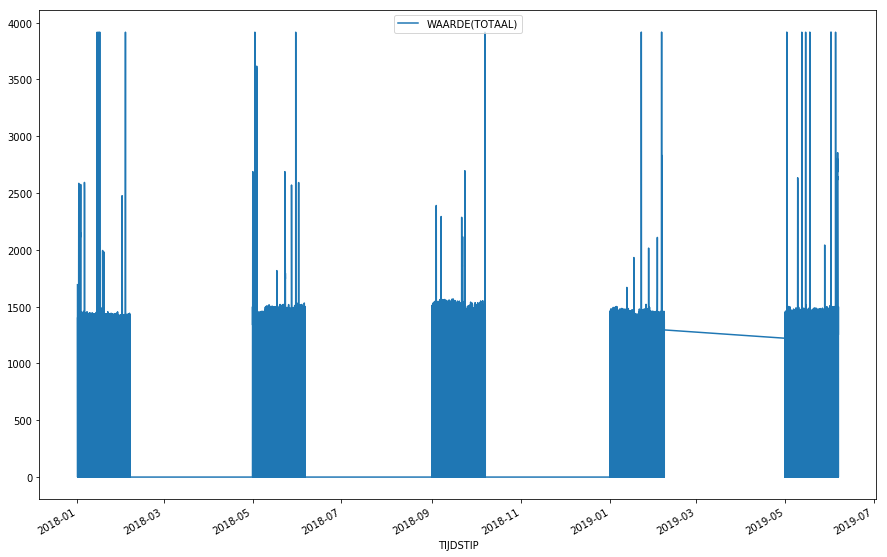

In [46]:
for i, df in data2:
    if df['MEETPUNT'].all() == 'Debiet ':
        df['WAARDE(TOTAAL)'] = df['WAARDE(TOTAAL)'].astype(int)
        df.plot(x= 'TIJDSTIP', y = 'WAARDE(TOTAAL)', figsize=(15,10))